In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
tf.random.set_seed(7)


In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [ ]:
max_review_lengeth = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_review_lengeth)
X_test = sequence.pad_sequences(X_test, maxlen = max_review_lengeth)

In [ ]:
embedding_vector_lengeth = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_lengeth, input_length = max_review_lengeth))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 8, batch_size = 64)

Epoch 1/8
391/391 [==============================] - 66s 155ms/step - loss: 0.4574 - accuracy: 0.7807 - val_loss: 0.3476 - val_accuracy: 0.8522
Epoch 2/8
391/391 [==============================] - 30s 77ms/step - loss: 0.3192 - accuracy: 0.8716 - val_loss: 0.4483 - val_accuracy: 0.8383
Epoch 3/8
391/391 [==============================] - 20s 52ms/step - loss: 0.2472 - accuracy: 0.9038 - val_loss: 0.3210 - val_accuracy: 0.8749
Epoch 4/8
391/391 [==============================] - 21s 54ms/step - loss: 0.2183 - accuracy: 0.9170 - val_loss: 0.3091 - val_accuracy: 0.8742
Epoch 5/8
391/391 [==============================] - 20s 52ms/step - loss: 0.1924 - accuracy: 0.9266 - val_loss: 0.3201 - val_accuracy: 0.8658
Epoch 6/8
391/391 [==============================] - 15s 38ms/step - loss: 0.1701 - accuracy: 0.9372 - val_loss: 0.3383 - val_accuracy: 0.8706
Epoch 7/8
391/391 [==============================] - 15s 39ms/step - loss: 0.1619 - accuracy: 0.9391 - val_loss: 0.3554 - val_accuracy: 0.860

In [ ]:
import matplotlib.pyplot as plt

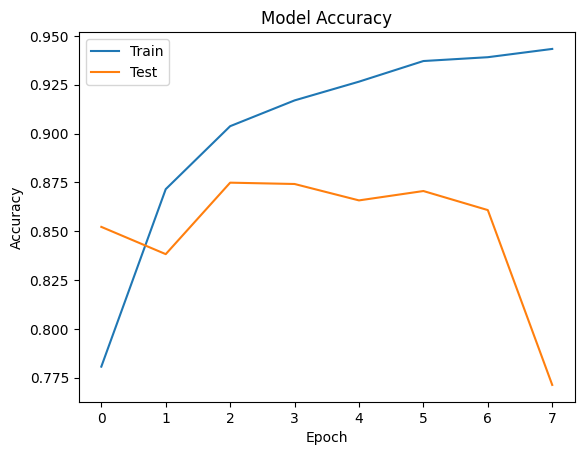

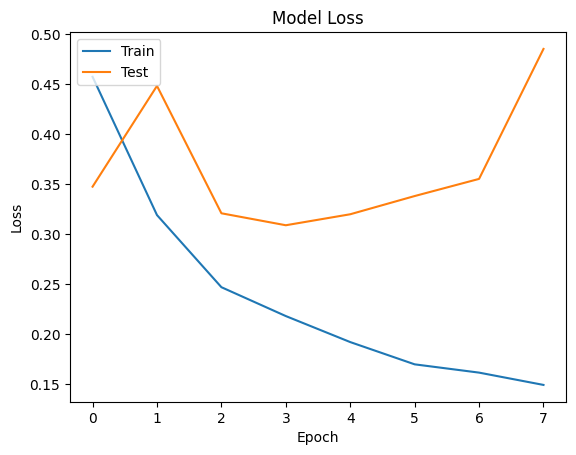

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_lengeth))
model.add(LSTM(100, dropout=0.2))  # Adding dropout with a dropout rate of 0.2
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model with dropout
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=64)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/8
391/391 [==============================] - 49s 110ms/step - loss: 0.4589 - accuracy: 0.7798 - val_loss: 0.3483 - val_accuracy: 0.8534
Epoch 2/8
391/391 [==============================] - 23s 59ms/step - loss: 0.3174 - accuracy: 0.8719 - val_loss: 0.3230 - val_acc

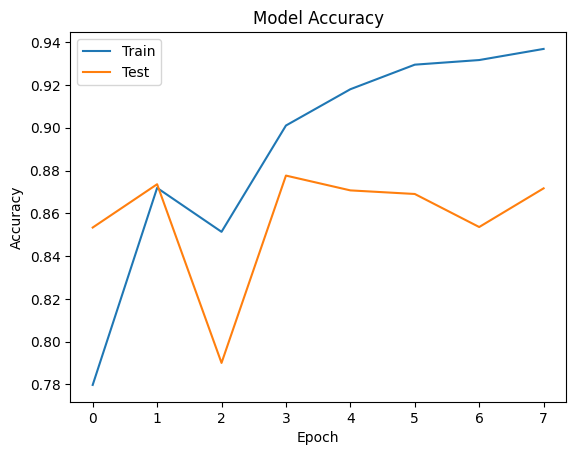

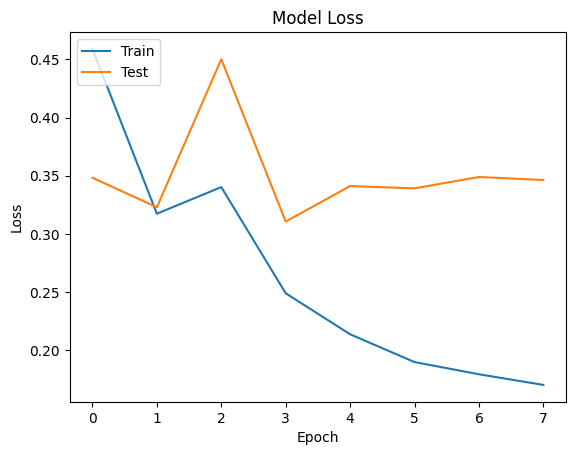

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()